## Comparison of Categorical Variable Encodings

In this lecture, we will compare the performance of the different feature categorical encoding techniques we learned so far.

We will compare:

- One hot encoding
- Replacing labels by the count
- Ordering labels according to target
- Mean Encoding
- WoE

the exercise is based on the notes of:
Feature Engineering for Machine Learning
by Soledad Galli

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

# Dataset
This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.  Attributes 2 through 10 have been used to represent instances.   
Each instance has one of 2 possible classes: benign or malignant.
Class: 2 for benign, 4 for malignant

In [2]:
data_raw = pd.read_csv('C:\\Users\gusal\machine learning\Feature engineering\Brest_Cancer.csv')

In [3]:
data_raw.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,2,5,1,1,1,2,1,3,1,1
1,2,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,2,6,8,8,1,3,4,3,7,1
4,2,4,1,1,3,2,1,3,1,1


In [4]:
data_raw.dtypes

Class                          int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
dtype: object

In [5]:
# Before I splited the data in test and training and found that 'Uniformity of Cell Shape' = 9, did not appeared in 
# the data test, because there are so little quantity of observations in this category with this value

In [6]:
#data_raw['Uniformity of Cell Shape'].unique()
data_raw['Uniformity of Cell Shape'].value_counts().sort_values(ascending=False)

1     346
2      58
10     58
3      53
4      43
5      32
7      30
6      29
8      27
9       7
Name: Uniformity of Cell Shape, dtype: int64

In [7]:
# the following function calculates:

# 1) the percentage of students per category
# 2) the mean G3 per category


def calculate_mean_target_per_category(df, var):

    # total number of students
    total_observations = len(df)

    # percentage of observations per category
    temp_df = pd.Series(df[var].value_counts() / total_observations).reset_index()
    temp_df.columns = [var, 'perc_observations']

    # add the mean G3
    temp_df = temp_df.merge(df.groupby([var])['Class'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [8]:

# now we use the function for the variable 'school'
temp_df = calculate_mean_target_per_category(data_raw, 'Uniformity of Cell Shape')
temp_df


,Uniformity of Cell Shape,perc_observations,Class
0,1,0.506589,2.011561
1,10,0.084919,4.000000
2,2,0.084919,2.241379
3,3,0.077599,2.867925
4,4,0.062958,3.441860
5,5,0.046852,3.875000
6,7,0.043924,3.866667
7,6,0.042460,3.862069
8,8,0.039531,3.925926
9,9,0.010249,4.000000


In [9]:
data_raw_OHE = data_raw.copy()

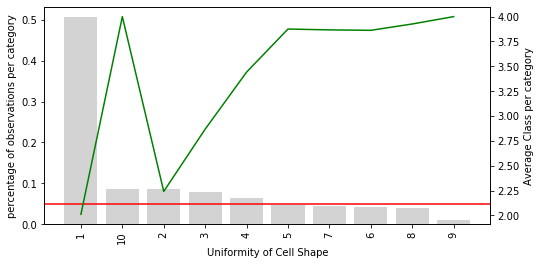

In [10]:
#This will help us visualise the relationship between the
# target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_observations"], color='lightgrey')
    ax2.plot(df.index, df["Class"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of observations per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Class per category')
    plt.show()

plot_categories(temp_df, 'Uniformity of Cell Shape')

### Rare labels: grouping under a new label

One common way of working with rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. In this way, we are able to understand the "collective" effect of the infrequent labels on the target. See below.

In [11]:
# Uniformity of Cell Shape = 9 is a rare value, this rate values did not appear simultasneously in 
# the train and test data when the data was splited (in a previous exercise). Uniformity of Cell Shape 8 and 9 can be 
# combined together because are considered rare values and their Class mean is very similar 

In [12]:
# I will replace all the labels that appear in less than 4%
# of the students by the label '8_and_9'


def group_rare_labels(df, var):

    total_observations = len(df)

    # first I calculate the % of observations for each category
    temp_df = pd.Series(df[var].value_counts() / total_observations)

    # now I create a dictionary to replace the rare labels with the
    # string '8_and_9' if they are present in less than 4% of students

    grouping_dict = {
        k: ('8_and_9' if k not in temp_df[temp_df >= 0.04].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [13]:
# group rare labels in absences

data_raw['Uniformity of Cell Shape_grouped'] = group_rare_labels(data_raw, 'Uniformity of Cell Shape')

data_raw[['Uniformity of Cell Shape', 'Uniformity of Cell Shape_grouped']].head(10)

,Uniformity of Cell Shape,Uniformity of Cell Shape_grouped
0,1,1
1,4,4
2,1,1
3,8,8_and_9
4,1,1
5,10,10
6,1,1
7,2,2
8,1,1
9,1,1


In [14]:
data_raw.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Uniformity of Cell Shape_grouped
0,2,5,1,1,1,2,1,3,1,1,1
1,2,5,4,4,5,7,10,3,2,1,4
2,2,3,1,1,1,2,2,3,1,1,1
3,2,6,8,8,1,3,4,3,7,1,8_and_9
4,2,4,1,1,3,2,1,3,1,1,1


In [15]:
# dropping Uniformity of Cell Shape and later re-naming Uniformity of Cell Shape_grouped

In [16]:
data_raw = data_raw.drop(['Uniformity of Cell Shape'], axis = 1)

In [17]:
data_raw.head()

,Class,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Uniformity of Cell Shape_grouped
0,2,5,1,1,2,1,3,1,1,1
1,2,5,4,5,7,10,3,2,1,4
2,2,3,1,1,2,2,3,1,1,1
3,2,6,8,1,3,4,3,7,1,8_and_9
4,2,4,1,3,2,1,3,1,1,1


In [18]:
data_raw = data_raw.rename(columns = {'Uniformity of Cell Shape_grouped' : 'Uniformity of Cell Shape'})

In [19]:
data_raw.head()

,Class,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Uniformity of Cell Shape
0,2,5,1,1,2,1,3,1,1,1
1,2,5,4,5,7,10,3,2,1,4
2,2,3,1,1,2,2,3,1,1,1
3,2,6,8,1,3,4,3,7,1,8_and_9
4,2,4,1,3,2,1,3,1,1,1


In [20]:
data_raw.dtypes

Class                           int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                     int64
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Uniformity of Cell Shape       object
dtype: object

In [21]:
#data_raw.Class.replace(2,0, inplace = True)
data_raw.Class = data_raw.Class.map({2 : 0, 4: 1})

In [22]:
data_raw.head(10)

,Class,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Uniformity of Cell Shape
0,0,5,1,1,2,1,3,1,1,1
1,0,5,4,5,7,10,3,2,1,4
2,0,3,1,1,2,2,3,1,1,1
3,0,6,8,1,3,4,3,7,1,8_and_9
4,0,4,1,3,2,1,3,1,1,1
5,1,8,10,8,7,10,9,7,1,10
6,0,1,1,1,2,10,3,1,1,1
7,0,2,1,1,2,1,3,1,1,2
8,0,2,1,1,2,1,1,1,5,1
9,0,4,2,1,2,1,2,1,1,1


In [23]:
data_raw.dtypes

Class                           int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                     int64
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Uniformity of Cell Shape       object
dtype: object

In [24]:
data_raw.head()

,Class,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Uniformity of Cell Shape
0,0,5,1,1,2,1,3,1,1,1
1,0,5,4,5,7,10,3,2,1,4
2,0,3,1,1,2,2,3,1,1,1
3,0,6,8,1,3,4,3,7,1,8_and_9
4,0,4,1,3,2,1,3,1,1,1


In [25]:
# let's check for missing data

data_raw.isnull().sum()

Class                          0
Clump Thickness                0
Uniformity of Cell Size        0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Uniformity of Cell Shape       0
dtype: int64

In [26]:
inputs = data_raw.drop(['Class'], axis = 1)
target = data_raw.Class

In [27]:
inputs = inputs.astype(object)

In [28]:
inputs.dtypes

Clump Thickness                object
Uniformity of Cell Size        object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Uniformity of Cell Shape       object
dtype: object

In [29]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    inputs,  # predictors
    target,  # target
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((478, 9), (205, 9))

In [30]:
# Checking that all the labels in training are also in testing

In [31]:
temp1 = X_train.columns

In [32]:
temp2 = X_test.columns

In [59]:
temp3 = [item for item in temp1 if item not in temp2]
temp3

[]

### One Hot Encoding

In [35]:
def get_OHE(df):

    df_OHE = pd.get_dummies(df[['Clump Thickness', 'Uniformity of Cell Size ','Marginal Adhesion', 
                                'Single Epithelial Cell Size', 'Bare Nuclei','Bland Chromatin', 
                                'Normal Nucleoli', 'Mitoses', 'Uniformity of Cell Shape']], drop_first=True)

    return df_OHE


X_train_OHE = get_OHE(X_train)
X_test_OHE = get_OHE(X_test)



In [36]:
X_train_OHE.head()

,Clump Thickness_2,Clump Thickness_3,Clump Thickness_4,Clump Thickness_5,Clump Thickness_6,Clump Thickness_7,Clump Thickness_8,Clump Thickness_9,Clump Thickness_10,Uniformity of Cell Size _2,Uniformity of Cell Size _3,Uniformity of Cell Size _4,Uniformity of Cell Size _5,Uniformity of Cell Size _6,Uniformity of Cell Size _7,Uniformity of Cell Size _8,Uniformity of Cell Size _9,Uniformity of Cell Size _10,Marginal Adhesion_2,Marginal Adhesion_3,Marginal Adhesion_4,Marginal Adhesion_5,Marginal Adhesion_6,Marginal Adhesion_7,Marginal Adhesion_8,Marginal Adhesion_9,Marginal Adhesion_10,Single Epithelial Cell Size_2,Single Epithelial Cell Size_3,Single Epithelial Cell Size_4,Single Epithelial Cell Size_5,Single Epithelial Cell Size_6,Single Epithelial Cell Size_7,Single Epithelial Cell Size_8,Single Epithelial Cell Size_9,Single Epithelial Cell Size_10,Bare Nuclei_2,Bare Nuclei_3,Bare Nuclei_4,Bare Nuclei_5,Bare Nuclei_6,Bare Nuclei_7,Bare Nuclei_8,Bare Nuclei_9,Bare Nuclei_10,Bland Chromatin_2,Bland Chromatin_3,Bland Chromatin_4,Bland Chromatin_5,Bland Chromatin_6,Bland Chromatin_7,Bland Chromatin_8,Bland Chromatin_9,Bland Chromatin_10,Normal Nucleoli_2,Normal Nucleoli_3,Normal Nucleoli_4,Normal Nucleoli_5,Normal Nucleoli_6,Normal Nucleoli_7,Normal Nucleoli_8,Normal Nucleoli_9,Normal Nucleoli_10,Mitoses_2,Mitoses_3,Mitoses_4,Mitoses_5,Mitoses_6,Mitoses_7,Mitoses_8,Mitoses_10,Uniformity of Cell Shape_2,Uniformity of Cell Shape_3,Uniformity of Cell Shape_4,Uniformity of Cell Shape_5,Uniformity of Cell Shape_6,Uniformity of Cell Shape_7,Uniformity of Cell Shape_10,Uniformity of Cell Shape_8_and_9
177,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
457,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
429,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train_OHE.shape

(478, 79)

In [38]:
X_test_OHE.shape

(205, 79)

### Count encoding

In [39]:
def categorical_to_counts(df_train, df_test):

    # make a temporary copy of the original dataframes
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()

    for col in ['Clump Thickness', 'Uniformity of Cell Size ', 'Uniformity of Cell Shape','Marginal Adhesion', 
                'Single Epithelial Cell Size', 'Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitoses']: 
       
        # make dictionary mapping category to counts
        counts_map = df_train_temp[col].value_counts().to_dict()

        # remap the labels to their counts
        df_train_temp[col] = df_train_temp[col].map(counts_map)
        df_test_temp[col] = df_test_temp[col].map(counts_map)

    return df_train_temp, df_test_temp


X_train_count, X_test_count = categorical_to_counts(X_train, X_test)



In [40]:
X_train_count.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Uniformity of Cell Shape
177,95,20,17,25,90,47,19,400,27
457,22,264,276,29,288,102,307,400,247
429,95,264,15,45,288,118,307,400,247
83,95,44,276,20,12,31,34,6,23
501,99,264,276,29,288,102,307,400,247


### Ordered Integer Encoding

In [41]:
def categories_to_ordered(df_train, df_test, y_train, y_test):

    # make a temporary copy of the datasets
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()

    for col in ['Clump Thickness', 'Uniformity of Cell Size ', 'Uniformity of Cell Shape','Marginal Adhesion', 
                'Single Epithelial Cell Size', 'Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitoses']:

        # order categories according to target mean
        ordered_labels = df_train_temp.groupby(
            [col])['Class'].mean().sort_values().index

        # create the dictionary to map the ordered labels to an ordinal number
        ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

        # remap the categories  to these ordinal numbers
        df_train_temp[col] = df_train[col].map(ordinal_label)
        df_test_temp[col] = df_test[col].map(ordinal_label)

    # remove the target
    df_train_temp.drop(['Class'], axis=1, inplace=True)
    df_test_temp.drop(['Class'], axis=1, inplace=True)

    return df_train_temp, df_test_temp


X_train_ordered, X_test_ordered = categories_to_ordered(
    X_train, X_test, y_train, y_test)



In [42]:
X_train_ordered.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Uniformity of Cell Shape
177,4,6,8,5,7,6,5,0,7
457,5,0,0,0,0,0,0,0,0
429,4,0,3,2,0,1,0,0,0
83,4,9,0,7,3,3,9,8,5
501,0,0,0,0,0,0,0,0,0


### Mean Encoding

In [43]:
def categories_to_mean(df_train, df_test, y_train, y_test):

    # make a temporary copy of the datasets
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()

    for col in ['Clump Thickness', 'Uniformity of Cell Size ', 'Uniformity of Cell Shape','Marginal Adhesion', 
                'Single Epithelial Cell Size', 'Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitoses']:

        # calculate mean target per category
        ordered_labels = df_train_temp.groupby(
            [col])['Class'].mean().to_dict()

        # remap the categories to target mean
        df_train_temp[col] = df_train[col].map(ordered_labels)
        df_test_temp[col] = df_test[col].map(ordered_labels)

    # remove the target
    df_train_temp.drop(['Class'], axis=1, inplace=True)
    df_test_temp.drop(['Class'], axis=1, inplace=True)

    return df_train_temp, df_test_temp


X_train_mean, X_test_mean = categories_to_mean(
    X_train, X_test, y_train, y_test)


In [44]:
X_train_mean.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Uniformity of Cell Shape
177,0.326316,0.950000,1.000000,0.840000,0.988889,0.957447,0.842105,0.2275,0.962963
457,0.454545,0.015152,0.061594,0.034483,0.034722,0.019608,0.094463,0.2275,0.008097
429,0.326316,0.015152,0.800000,0.555556,0.034722,0.059322,0.094463,0.2275,0.008097
83,0.326316,1.000000,0.061594,0.950000,0.583333,0.806452,1.000000,1.0000,0.913043
501,0.030303,0.015152,0.061594,0.034483,0.034722,0.019608,0.094463,0.2275,0.008097


### WoE

In [45]:
# 0 for benign, 1 for malignant

def categories_to_woe(df_train, df_test, y_train, y_test):

    # make a temporary copy of the datasets
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()

    for col in ['Clump Thickness', 'Uniformity of Cell Size ', 'Uniformity of Cell Shape','Marginal Adhesion', 
                'Single Epithelial Cell Size', 'Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitoses']:

        # create df containing the different parts of the WoE equation
        # prob survived = 1
        prob_df = pd.DataFrame(df_train_temp.groupby([col])['Class'].mean())

        # prob benign = 0
        prob_df['benign'] = 1-prob_df.Class

        # calculate WoE
        prob_df['WoE'] = np.log(prob_df.Class/prob_df.benign)
        
        # when prob_df.malignant == 0 the division is not defined, therfore I make prob_df['WoE'] = 4.6
        # where log(0.99/0.01) = 4.6
        
        prob_df['WoE'] = np.where(prob_df.benign == 0, 4.6, np.log(prob_df.Class/prob_df.benign))
        
        # capture woe in dictionary
        woe = prob_df['WoE'].to_dict()

        # re-map the labels to WoE
        df_train_temp[col] = df_train[col].map(woe)
        df_test_temp[col] = df_test[col].map(woe)

    # drop the target
    df_train_temp.drop(['Class'], axis=1, inplace=True)
    df_test_temp.drop(['Class'], axis=1, inplace=True)

    return df_train_temp, df_test_temp


X_train_woe, X_test_woe = categories_to_woe(X_train, X_test, y_train, y_test)



In [46]:
X_train_woe.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Uniformity of Cell Shape
177,-0.724896,2.944439,4.600000,1.658228,4.488636,3.113515,1.673976,-1.222482,3.258097
457,-0.182322,-4.174387,-2.723615,-3.332205,-3.325036,-3.912023,-2.260325,-1.222482,-4.808111
429,-0.724896,-4.174387,1.386294,0.223144,-3.325036,-2.763620,-2.260325,-1.222482,-4.808111
83,-0.724896,4.600000,-2.723615,2.944439,0.336472,1.427116,4.600000,4.600000,2.351375
501,-3.465736,-4.174387,-2.723615,-3.332205,-3.325036,-3.912023,-2.260325,-1.222482,-4.808111


### Random Forest Performance

In [47]:
# create a function to build random forests and compare performance in train and test set


def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(n_estimators=50, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [48]:
# OHE
run_randomForests(X_train_OHE, X_test_OHE, y_train, y_test)

Train set
Random Forests roc-auc: 0.9882242294805729
Test set
Random Forests roc-auc: 0.9769836462749848


In [49]:
# counts
run_randomForests(X_train_count, X_test_count, y_train, y_test)

Train set
Random Forests roc-auc: 0.99373003899132
Test set
Random Forests roc-auc: 0.9919240864122754


In [50]:
# ordered labels
run_randomForests(X_train_ordered, X_test_ordered, y_train, y_test)

Train set
Random Forests roc-auc: 0.9972960793150067
Test set
Random Forests roc-auc: 0.9949525540076721


In [51]:
# mean encoding
run_randomForests(X_train_mean, X_test_mean, y_train, y_test)

Train set
Random Forests roc-auc: 0.997335266571311
Test set
Random Forests roc-auc: 0.9952554007672119


In [52]:
# woe
run_randomForests(X_train_woe, X_test_woe, y_train, y_test)

Train set
Random Forests roc-auc: 0.9972960793150067
Test set
Random Forests roc-auc: 0.9951544518473653


In [53]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, C=0.01)
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [54]:
# OHE
run_logistic(X_train_OHE, X_test_OHE, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9895370025667654
Test set
Logistic Regression roc-auc: 0.986069049061175


In [55]:
# counts
run_logistic(X_train_count, X_test_count, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9872641417011188
Test set
Logistic Regression roc-auc: 0.9906117504542701


In [56]:
# ordered labels
run_logistic(X_train_ordered, X_test_ordered, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.997335266571311
Test set
Logistic Regression roc-auc: 0.9958610942862911


In [57]:
# mean encoding
run_logistic(X_train_mean, X_test_mean, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9946705331426221
Test set
Logistic Regression roc-auc: 0.9953563496870583


In [58]:
# woe
run_logistic(X_train_woe, X_test_woe, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9970609557771812
Test set
Logistic Regression roc-auc: 0.9966686856450636
